# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
user_data = pd.read_table('mini.csv', sep=',')
user_data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [3]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [4]:
user_data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


## 데이터 이해하기

```
subscription_duration: 서비스 가입으로부터 경과한 기간 (월)
recent_login_time: 마지막으로 로그인으로부터 경과한 시간 (일)
average_login_time: 사용자의 일반적인 로그인 시간?
average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
total_completed_courses: 완료한 총 코스 수 (하나의 코스는 여러 개의 세션으로 구성)
recent_learning_achievement: 최근 학습 성취도?
abandoned_learning_sessions: 중단된 학습 세션 수
community_engagement_level: 사용자의 커뮤니티 참여도에 따라 1 ~ 5 레벨로 구분한 값
preferred_difficulty_level: 사용자가 선호하는 난이도 (난이도는 Low, Medium, High 3단계로 구분됨)
subscription_type: 구독 유형 (Basic과 Premium으로 구분됨)
customer_inquiry_history: 고객 문의 이력 (건수)
```

## 사용자 학습 패턴 분석

In [ ]:
# 서비스 가입으로부터 경과한 시간과 구독 연장 여부의 상관 관계 분석 - 가입한 기간에 상응하는 보상?
# 마지막 로그인으로부터 경과한 시간과 구독 연장 여부의 상관 관계 분석 - 서비스 방문 독려?
# 각 학습 세션에 소요된 평균 시간과 구독 연장 여부의 상관 관계 분석 - 얼마나 집중하고 있는가와 구독 연장이 관계가 있을까?
# 완료한 총 코스 수가 구독 연장 여부와 상관이 있을까?
# 최근 학습 성취도와 구독 연장 여부가 상관이 있을까? 

### 서비스 가입 기간 분석

In [46]:
subscription_duration = user_data.groupby('subscription_duration')['user_id'].count()
subscription_duration

subscription_duration
1     436
2     443
3     408
4     475
5     424
6     471
7     432
8     438
9     440
10    448
11    428
12    461
13    437
14    418
15    408
16    448
17    429
18    464
19    423
20    412
21    433
22    414
23    410
Name: user_id, dtype: int64

### 로그인 경과 시간 분석

In [53]:
recent_login_time = user_data.groupby('recent_login_time')['user_id'].count()
recent_login_time

recent_login_time
1     347
2     350
3     349
4     332
5     355
6     362
7     322
8     322
9     350
10    335
11    306
12    365
13    363
14    366
15    325
16    347
17    354
18    336
19    380
20    362
21    333
22    349
23    338
24    328
25    323
26    359
27    370
28    313
29    359
Name: user_id, dtype: int64

```
서비스 가입 기간과 로그인 경과 시간은 거의 균일하게 분포하고 있어 구독 연장 여부와의 상관 관계 분석이 어렵다고 판단됨
```

### 학습 세션 평균 소요 시간 분석

In [54]:
average_time_per_learning_session  = user_data.groupby('average_time_per_learning_session')['user_id'].count()
average_time_per_learning_session

average_time_per_learning_session
0.011515      1
0.012562      1
0.013535      1
0.017473      1
0.029555      1
             ..
444.324058    1
447.095844    1
470.289498    1
490.233443    1
503.372616    1
Name: user_id, Length: 10000, dtype: int64

## 사용자가 선호하는 강좌 난이도 분석

In [6]:
# 사용자들이 선호하는 강좌 난이도를 분석 
preferred_difficulty = user_data.groupby('preferred_difficulty_level')['user_id'].count()
preferred_difficulty

preferred_difficulty_level
High      2000
Low       4992
Medium    3008
Name: user_id, dtype: int64

In [7]:
difficulty = ['Low', 'Medium', 'High']
preferred_difficulty = preferred_difficulty.agg(difficulty)
preferred_difficulty

Low       4992
Medium    3008
High      2000
Name: user_id, dtype: int64

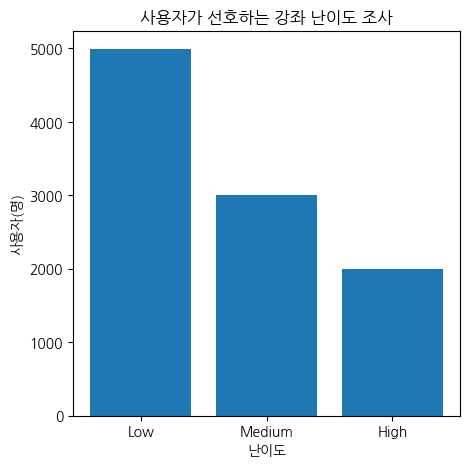

In [8]:
# 데이터 시각화

plt.figure(figsize=(5, 5))
plt.bar(preferred_difficulty.index, preferred_difficulty.values)
plt.title('사용자가 선호하는 강좌 난이도 조사')
plt.xlabel('난이도')
plt.ylabel('사용자(명)')

plt.show()

In [9]:
# 코호트 분석을 통해 위의 조사 결과가 구독 연장과 관련하여 유의미한 데이터인지 확인해보자 

difficulty_pivot_table = pd.pivot_table(user_data, values='user_id', 
                                        index=['preferred_difficulty_level'], columns=['target'],  aggfunc="count").agg(difficulty)  
difficulty_pivot_table

target,0,1
Low,1945,3047
Medium,1097,1911
High,759,1241


In [10]:
cohort_difficulty_pivot_table = difficulty_pivot_table.divide(preferred_difficulty, axis=0).round(3)
cohort_difficulty_pivot_table

target,0,1
Low,0.390,0.610
Medium,0.365,0.635
High,0.380,0.620


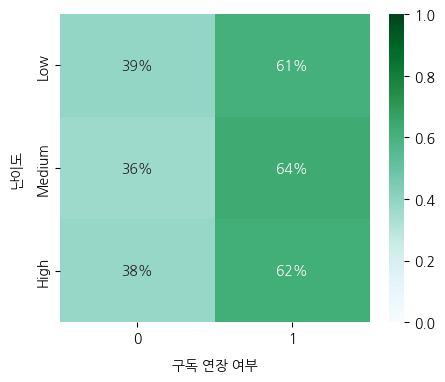

In [11]:
plt.figure(figsize=(5,4))

sns.heatmap(data= cohort_difficulty_pivot_table, annot=True, fmt='.0%', vmin=0, vmax=1, cmap="BuGn")

plt.xlabel('구독 연장 여부', fontsize = 10, labelpad = 10)
plt.ylabel('난이도', fontsize = 10, labelpad = 10)

plt.show()

```
코호트 분석을 통해 각 난이도를 선호하는 사용자들 중 60% 이상이 구독 연장 계획을 가지고 있다는 사실을 확인할 수 있었다. 
따라서 Low 난이도의 강좌가 가장 선호된다는 데이터는 유의미한 것으로 판단되며, 
Low 난이도 강좌의 신규 개설이 사용자들의 구독 연장에 긍정적인 영향을 줄 것이라 예상된다.
```

## 구독 유형 분석

In [12]:
# 사용자들의 구독 유형 분포를 알아보자

subscription = user_data.groupby('subscription_type')['user_id'].count()
subscription

subscription_type
Basic      5979
Premium    4021
Name: user_id, dtype: int64

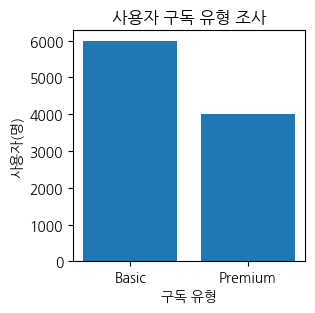

In [13]:
# 데이터 시각화

plt.figure(figsize=(3, 3))
plt.bar(subscription.index, subscription.values)
plt.title('사용자 구독 유형 조사')
plt.xlabel('구독 유형')
plt.ylabel('사용자(명)')

plt.show()

In [14]:
# 구독 유형별 연장 여부를 분석해보자

subscription_pivot_table = pd.pivot_table(user_data, values='user_id', 
                                        index=['target'], columns=['subscription_type'],  aggfunc="count")  
subscription_pivot_table

subscription_type,Basic,Premium
target,,
0,2296,1505
1,3683,2516


In [15]:
extend_or_not = user_data.groupby('target')['user_id'].count() 
extend_or_not

target
0    3801
1    6199
Name: user_id, dtype: int64

In [49]:
cohort_subscription_pivot_table = subscription_pivot_table.divide(10000, axis=0).round(3)
cohort_subscription_pivot_table

subscription_type,Basic,Premium
target,,
0,0.230,0.150
1,0.368,0.252


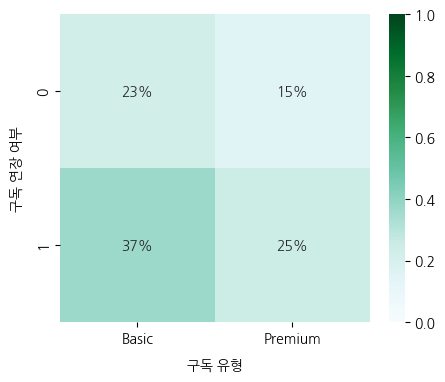

In [50]:
plt.figure(figsize = (5,4))

sns.heatmap(data = cohort_subscription_pivot_table , annot = True, fmt = '.0%', vmin = 0, vmax = 1, cmap = "BuGn")

plt.xlabel('구독 유형', fontsize = 10, labelpad = 10)
plt.ylabel('구독 연장 여부', fontsize = 10, labelpad = 10)

plt.show()

```
구독 연장 여부와 관계 없이 Basic 유형과 Premium 유형의 비율은 모두 6:4로 동일하다.
이를 통해 구독 유형과 구독 연장 여부가 특별한 상관 관계를 갖는다고 보기 어려움을 알 수 있다.
```

## 커뮤니티 참여도 분석

In [19]:
community_engagement = user_data.groupby('community_engagement_level')['user_id'].count()
community_engagement

community_engagement_level
1     559
2    1219
3    1588
4    2070
5    4564
Name: user_id, dtype: int64

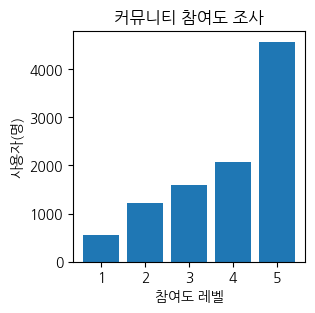

In [35]:
# 데이터 시각화

plt.figure(figsize=(3, 3))

plt.bar(community_engagement.index, community_engagement.values)
plt.title('커뮤니티 참여도 조사')
plt.xlabel('참여도 레벨')
plt.ylabel('사용자(명)')
plt.xticks([1,2,3,4,5])

plt.show()

In [27]:
# 가설: 다음달에도 구독할 사용자의 수는 커뮤니티 참여도에 비례할 것이다.
# 가설이 맞을지 코호트 분석을 통해 확인해보자

community_engagement_pivot_table = pd.pivot_table(user_data, values='user_id', 
                                        index=['target'], columns=['community_engagement_level'],  aggfunc="count")  
community_engagement_pivot_table

community_engagement_level,1,2,3,4,5
target,,,,,
0,211,468,620,805,1697
1,348,751,968,1265,2867


In [47]:
cohort_community_engagement_pivot_table = community_engagement_pivot_table.divide(10000, axis=0).round(3)
cohort_community_engagement_pivot_table

community_engagement_level,1,2,3,4,5
target,,,,,
0,0.021,0.047,0.062,0.080,0.170
1,0.035,0.075,0.097,0.126,0.287


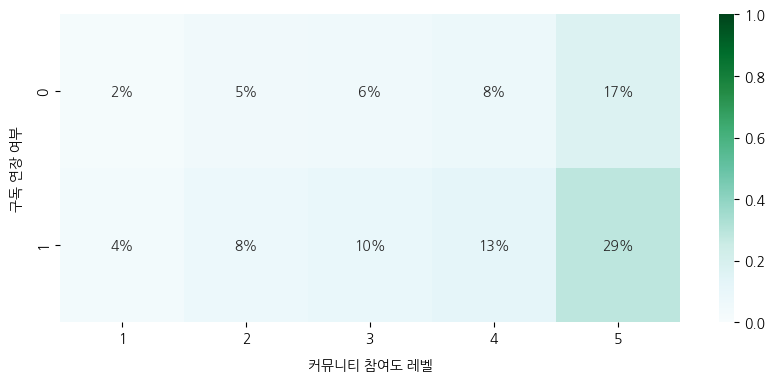

In [48]:
plt.figure(figsize = (10,4))

sns.heatmap(data = cohort_community_engagement_pivot_table , annot = True, fmt = '.0%', vmin = 0, vmax = 1, cmap = "BuGn")

plt.xlabel('커뮤니티 참여도 레벨', fontsize = 10, labelpad = 10)
plt.ylabel('구독 연장 여부', fontsize = 10, labelpad = 10)

plt.show()

```
모든 참여도 레벨에서 구독 연장 계획이 있는 사용자의 비율이 더 높았고, 특히 5레벨의 경우 12%p의 차이가 나는 것을 보아 
커뮤니티 활동에 더 열성적인 사용자들이 구독 연장 계획 또한 많이 가지고 있다는 것을 알 수 있다. 따라서 구독 연장률을 높이기 위해서는 사용자들의 커뮤니티를 통해 무엇을 얻기 원하는지 파악하고, 커뮤니티 참여를 독려해야 한다고 생각됨.
```

## 결제 패턴 분석

In [36]:
payment_pattern = user_data.groupby('payment_pattern')['user_id'].count()
payment_pattern

payment_pattern
0    1275
1    1285
2    1206
3    1230
4    1214
5    1238
6    1268
7    1284
Name: user_id, dtype: int64

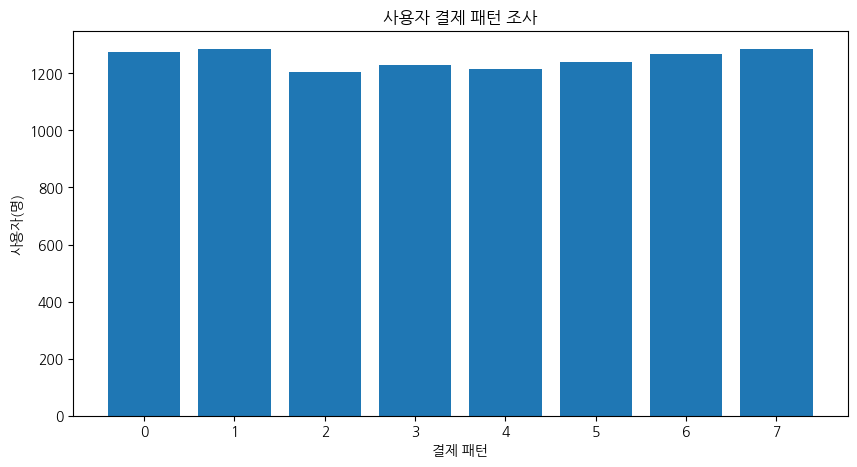

In [41]:
# 데이터 시각화

plt.figure(figsize=(10, 5))
plt.bar(payment_pattern.index, payment_pattern.values)
plt.title('사용자 결제 패턴 조사')
plt.xlabel('결제 패턴')
plt.ylabel('사용자(명)')

plt.show()

In [42]:
# 결제 패턴과 구독 연장 여부간의 상관관계가 성립하는지 알아보자

payment_pattern_engagement_pivot_table = pd.pivot_table(user_data, values='user_id', 
                                        index=['target'], columns=['payment_pattern'],  aggfunc="count")  
payment_pattern_engagement_pivot_table

payment_pattern,0,1,2,3,4,5,6,7
target,,,,,,,,
0,468,502,459,467,461,488,467,489
1,807,783,747,763,753,750,801,795


In [51]:
cohort_payment_pattern_engagement_pivot_table = payment_pattern_engagement_pivot_table.divide(10000, axis=0).round(3)
cohort_payment_pattern_engagement_pivot_table

payment_pattern,0,1,2,3,4,5,6,7
target,,,,,,,,
0,0.047,0.050,0.046,0.047,0.046,0.049,0.047,0.049
1,0.081,0.078,0.075,0.076,0.075,0.075,0.080,0.080


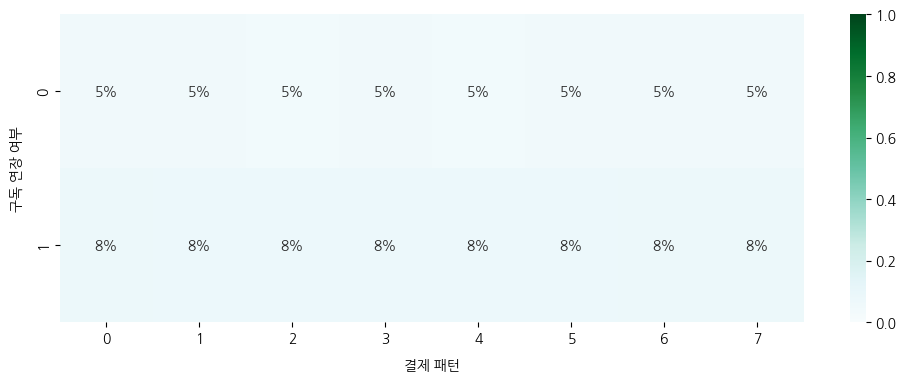

In [52]:
plt.figure(figsize = (12,4))

sns.heatmap(data = cohort_payment_pattern_engagement_pivot_table , annot = True, fmt = '.0%', vmin = 0, vmax = 1, cmap = "BuGn")

plt.xlabel('결제 패턴', fontsize = 10, labelpad = 10)
plt.ylabel('구독 연장 여부', fontsize = 10, labelpad = 10)

plt.show()

```
결제 패턴과 구독 연장 여부와의 상관관계를 찾을 수 없었음...
```